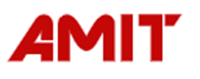
 # Deep Learning Final Project

This final project conclusively proves your understanding and comprehension of each part of the explanation, so you must perform all the following tasks to confirm your understanding and knowledge of each topic.

#### In this exceptional project, we will cover all topics related to deep learning. Therefore, it’s important to study carefully and answer each section thoroughly to demonstrate your understanding of the module. The final part is optional, but it’s highly encouraged if you make an effort to complete it. We will discuss the project in our upcoming lectures with each individual to ensure a comprehensive understanding of this extensive subject.



To assess your understanding we use a popular dataset called MNIST
- The MNIST dataset (Modified National Institute of Standards and Technology) is one of the most well-known datasets in the field of machine learning and computer vision. It consists of:

- Images:

60,000 training images and 10,000 test images.
Each image is a 28x28 grayscale image representing a handwritten digit (0-9).
The pixel values range from 0 (black) to 255 (white).
- Labels:

Each image has a corresponding label indicating which digit (0-9) it represents.

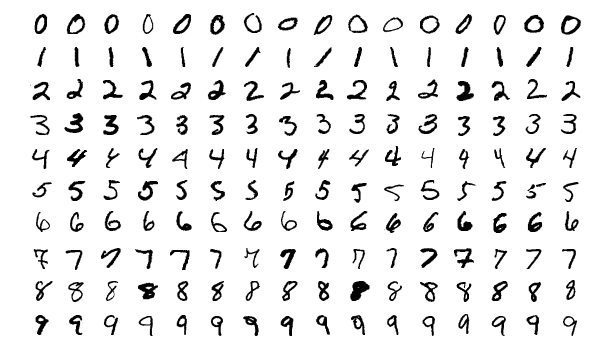

for  every project 

In [1]:
# import Libraries
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
print("We're using TF", tf.__version__)
import sys
sys.path.append("../..")
# import matplotlib_utils
from importlib import reload
from sklearn.model_selection import ParameterGrid
from keras.wrappers.scikit_learn import KerasClassifier
from tqdm import tqdm


We're using TF 2.10.0


# Look at the data

In this task we have 50000 28x28 images of digits from 0 to 9.
We will train a classifier on this data.

In [2]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train [shape (60000, 28, 28)] sample patch:
 [[0.         0.29803923 0.9647059  0.9882353  0.4392157 ]
 [0.         0.33333334 0.9882353  0.9019608  0.09803922]
 [0.         0.33333334 0.9882353  0.8745098  0.        ]
 [0.         0.33333334 0.9882353  0.5686275  0.        ]
 [0.         0.3372549  0.99215686 0.88235295 0.        ]]
A closeup of a sample patch:


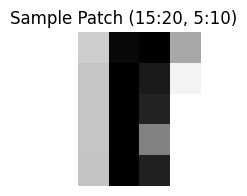

And the whole sample:


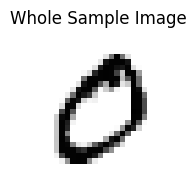

y_train [shape (60000,)] 10 samples:
 [5 0 4 1 9 2 1 3 1 4]


In [43]:
fig, ax = plt.subplots(figsize=(2, 2))  # Set figure size (width, height) in inches

# Display a sample patch from the image
print("X_train [shape %s] sample patch:\n" % (str(X_train.shape)), X_train[1, 15:20, 5:10])
print("A closeup of a sample patch:")
ax.imshow(X_train[1, 15:20, 5:10], cmap="Greys")
ax.set_title("Sample Patch (15:20, 5:10)")
ax.axis('off')  # Hide the axes
plt.show()

# Display the whole sample image with a different size
fig, ax = plt.subplots(figsize=(2, 2))  # Adjust the size as needed
print("And the whole sample:")
ax.imshow(X_train[1], cmap="Greys")
ax.set_title("Whole Sample Image")
ax.axis('off')  # Hide the axes
plt.show()

# Display the y_train values
print("y_train [shape %s] 10 samples:\n" % (str(y_train.shape)), y_train[:10])


# Load and preprocess the MNIST dataset

In [44]:
import tensorflow as tf

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess data (normalize)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0




# Flatten the images (28x28 -> 784)

In [45]:

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)



# One-hot encode labels

In [46]:

y_train_oh = tf.keras.utils.to_categorical(y_train, 10)
y_test_oh = tf.keras.utils.to_categorical(y_test, 10)



# Define a function to create and compile the model


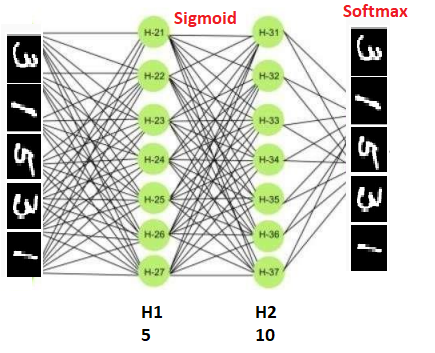

In [47]:
# Define a function to create and compile the model
def create_model(optimizer='adam', learning_rate=0.01):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(5, activation='sigmoid', input_shape=(784,)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    opt = tf.keras.optimizers.get(optimizer)
    opt.learning_rate = learning_rate
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model using the function
model = create_model(optimizer='adam', learning_rate=0.001)

# Train the model
history = model.fit(X_train, y_train_oh, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_oh)
print(f"Test accuracy: {test_acc}")

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 1.5752 - accuracy: 0.6413 - val_loss: 1.1161 - val_accuracy: 0.8102
Epoch 2/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.9221 - accuracy: 0.8231 - val_loss: 0.7502 - val_accuracy: 0.8445
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6913 - accuracy: 0.8472 - val_loss: 0.6076 - val_accuracy: 0.8593
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5901 - accuracy: 0.8568 - val_loss: 0.5400 - val_accuracy: 0.8654
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5341 - accuracy: 0.8641 - val_loss: 0.4986 - val_accuracy: 0.8708
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4982 - accuracy: 0.8699 - val_loss: 0.4772 - val_accuracy: 0.8719
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4752 - accuracy: 0.8727 - val_loss: 0.4536 - val_accuracy:

#### Put here the accuracy of the basic model 
| Accuracy         | ..................   |
|--------------|----------------|
 #### Give me the reson for this result

# Gride search algorithm to choose the best parameters

for code below try to choose another papmeters and try to built all avalaible parameters


In [49]:
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm


# Wrap the model using KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the parameter grid for grid search
param_grid = {
    'batch_size': [10, 20, 40],        # Different batch sizes
    'epochs': [5, 10],               # Different number of epochs
    'optimizer': ['adam', 'rmsprop'],  # Different optimizers
    'learning_rate': [0.001, 0.01]     # Different learning rates
}

# Initialize the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# Fit the grid search and wrap with progress bar
with tqdm(total=len(param_grid['batch_size']) * len(param_grid['epochs']), desc="Grid Search Progress", unit="iteration") as pbar:
    grid_result = grid.fit(X_train, y_train_oh)
    pbar.update(1)

# Use cv_results_ instead of the deprecated grid_scores_
print(f"Best score: {grid_result.best_score_} using {grid_result.best_params_}")

# Display the cross-validation results
for mean, std, params in zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score'], grid_result.cv_results_['params']):
    print(f"Mean: {mean:.4f}, Std: {std:.4f}, Params: {params}")

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
test_loss, test_acc = best_model.model.evaluate(X_test, y_test_oh)
print(f"Test Accuracy: {test_acc}")


- so kindly fill the table below to enhance your good choise  

-parameters on grid search 
| batch_size | optimizer_1 | optimizer_2 | learning_rate_1 | learning_rate_2 |
|------------|-------------|-------------|-----------------|-----------------|
| 2          | adam        | rmsprop     | 0.001           | 0.01            |
| 4          | adam        | rmsprop     | 0.001           | 0.01            |
| 8          | adam        | rmsprop     | 0.001           | 0.01            |
| 16         | adam        | rmsprop     | 0.001           | 0.01            |
| 32         | adam        | rmsprop     | 0.001           | 0.01            |
| 64         | adam        | rmsprop     | 0.001           | 0.01            |

-

 print here the best paramerters give you the best accuracy regarding for archticture design above
- | batch_size         | optimizer | learning_rate      | Accueracy      |
   |--------------|-----|-----------------|-----------------|
   |..............|.....|..................|-----------------|

- After you know the best optimizer and good Learning rate for the above archticture
- please design your model and put here the final result 

Here  i was converted squentional model into functional ApI Model
- so re-design Your model by adding some hidden layer and change the activation function

In [57]:
import tensorflow as tf

# Define the Functional API model
def create_model(optimizer='adam', learning_rate=0.01):
    # Input layer
    inputs = tf.keras.Input(shape=(784,))
    
    # Hidden layer
    x = tf.keras.layers.Dense(5, activation='sigmoid')(inputs)
    
    # Output layer
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
    
    # Create model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    # Configure the model
    opt = tf.keras.optimizers.get(optimizer)
    opt.learning_rate = learning_rate
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Create the model using the Functional API
model = create_model(optimizer='adam', learning_rate=0.001)

# Train the model
history = model.fit(X_train, y_train_oh, epochs=20, batch_size=40, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_oh)
print(f"Test accuracy: {test_acc}")

Epoch 1/20
1200/1200 [==============================] - 3s 2ms/step - loss: 1.5968 - accuracy: 0.6059 - val_loss: 1.1549 - val_accuracy: 0.7829
Epoch 2/20
1200/1200 [==============================] - 2s 2ms/step - loss: 0.9690 - accuracy: 0.7940 - val_loss: 0.8054 - val_accuracy: 0.8152
Epoch 3/20
1200/1200 [==============================] - 2s 2ms/step - loss: 0.7429 - accuracy: 0.8149 - val_loss: 0.6649 - val_accuracy: 0.8294
Epoch 4/20
1200/1200 [==============================] - 2s 2ms/step - loss: 0.6438 - accuracy: 0.8273 - val_loss: 0.5985 - val_accuracy: 0.8416
Epoch 5/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.5900 - accuracy: 0.8373 - val_loss: 0.5600 - val_accuracy: 0.8490
Epoch 6/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.5551 - accuracy: 0.8456 - val_loss: 0.5336 - val_accuracy: 0.8539
Epoch 7/20
1200/1200 [==============================] - 4s 4ms/step - loss: 0.5309 - accuracy: 0.8507 - val_loss: 0.5124 - val_accuracy:

Total Samples: The MNIST dataset has 60,000 training samples.

Batch Size: If your batch size is set to 40 (for example), each batch consists of 40 samples.

Batches per Epoch: The total number of batches for an epoch is calculated by dividing the total number of samples by the batch size. For instance, with 60,000 samples and a batch size of 40:

Epoch Iteration: During each epoch, the model goes through all the batches (1500 in this case), which means it sees all the training data once.



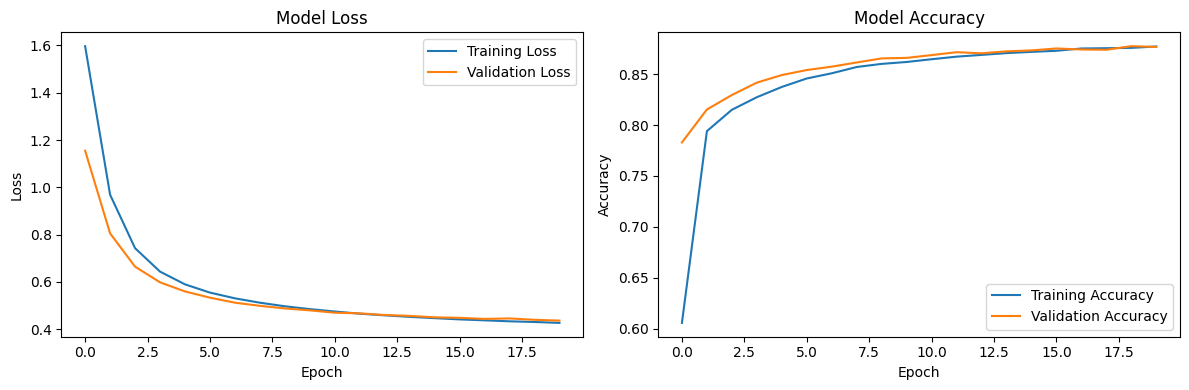

In [58]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

313/313 [==============================] - 0s 1ms/step


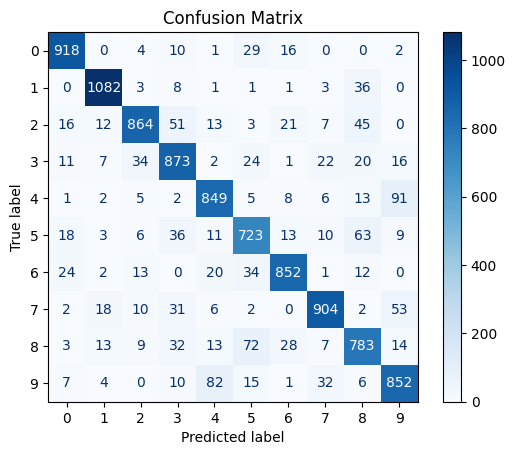

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

# Convert predictions and true labels to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_oh, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Hints!!!!

Total batches = Total samples / Batch size = 10,000 / 32 ≈ 313 batches.

# Answer the below Questions 

# Q1
### Why is the sigmoid function considered ineffective for hidden layers, and what are the benefits of using it in the output layer?

....................................................................................................................................

# Q2: For your enhanced model, please use the grid search algorithm to explore various optimization algorithms. Provide a brief description of each type and then list the best one in the table below.


| Optimizer   | Accuracy       |
|-------------|----------------|
| SGD         |                |
| Momentum    |                |
| RMSprop     |                |
| AdaDelta    |                |
| Adagrad     |                |
| Adam        |                |

-

# Q3: What is the main cause of the vanishing gradient problem, and how can we solve it?

## "In the code below, the model is likely experiencing the vanishing gradient problem. Try to solve it in a separate cell."

In [70]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomNormal
w_init = RandomNormal(mean=1,stddev=1)
model_2 = Sequential()
model_2.add(Dense(128, activation= 'sigmoid', kernel_initializer =w_init , input_dim=28*28))
model_2.add(Dense(128, activation= 'sigmoid', kernel_initializer =w_init ))
model_2.add(Dense(10, activation= 'softmax', kernel_initializer =w_init))
model_2.compile(loss = 'sparse_categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])
model_2.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           (None, 128)               100480    
                                                                 
 dense_111 (Dense)           (None, 128)               16512     
                                                                 
 dense_112 (Dense)           (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


c:\Users\Gsamuel\Desktop\R-D-ML-vision\teamcvpy\venv\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [74]:
history2=model_2.fit(X_train,y_train,epochs=10 , batch_size=128,validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 2.3084 - accuracy: 0.1051 - val_loss: 2.3112 - val_accuracy: 0.0914
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 2.3089 - accuracy: 0.1035 - val_loss: 2.3121 - val_accuracy: 0.0998
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 2.3087 - accuracy: 0.1049 - val_loss: 2.3137 - val_accuracy: 0.1035
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 2.3090 - accuracy: 0.1042 - val_loss: 2.3183 - val_accuracy: 0.1060
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 2.3081 - accuracy: 0.1031 - val_loss: 2.3045 - val_accuracy: 0.1081
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 2.3088 - accuracy: 0.1018 - val_loss: 2.3038 - val_accuracy: 0.0997
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 2.3090 - accuracy: 0.1045 - val_loss: 2.3089 - val_accuracy: 0.0914
Epoch 

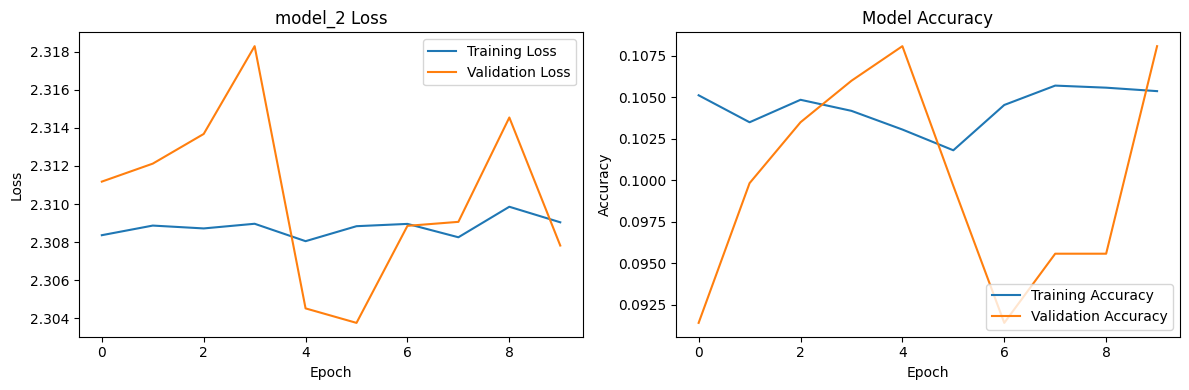

In [75]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('model_2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

#### After providing your answer to the question above, please share your opinion on how to improve the performance of this model or address the issue described.

# Exploding Gradient

# Q4: What is the main cause of the Exploding gradient problem, and how can we solve it?

In [77]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (_, _) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 784) / 255.0

# Create a simple neural network with two layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_shape=(784,), activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy')

# Perform gradient explosion
for _ in range(10):
    with tf.GradientTape() as tape:
        predictions = model(X_train)
        loss = tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(y_train, predictions)) #reduce_mean compute the average loss across all the training samples

    gradients = tape.gradient(loss, model.trainable_variables)
    gradients = [tf.clip_by_value(grad, -5.0, 5.0) if grad is not None else grad for grad in gradients]
    model.optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Print the gradient norms
    gradient_norms = [tf.norm(grad).numpy() for grad in gradients]
    print("Gradient Norms:", gradient_norms)

Gradient Norms: [0.5376286, 0.06820975, 1.6572814, 0.20540263]
Gradient Norms: [0.5171178, 0.063379586, 1.5452076, 0.19133505]
Gradient Norms: [0.49948362, 0.059059102, 1.4445592, 0.17868558]
Gradient Norms: [0.48422638, 0.055169467, 1.3536377, 0.1672437]
Gradient Norms: [0.47094956, 0.051647596, 1.2710757, 0.15683961]
Gradient Norms: [0.45933422, 0.048442286, 1.1957525, 0.1473342]
Gradient Norms: [0.44912118, 0.04551133, 1.1267382, 0.13861184]
Gradient Norms: [0.44009784, 0.042819552, 1.0632502, 0.130575]
Gradient Norms: [0.43208876, 0.04033731, 1.0046252, 0.123141184]
Gradient Norms: [0.42494828, 0.03803945, 0.95029753, 0.11623942]


## "Please provide proof of the effectiveness of your solution. How does it impact the results?" print here all Gradient term before and after add your solution



................................................................................

...........................................

# Q5: Provide proof of the effectiveness of adding a Dropout layer to the model. Additionally, provide a brief description of how Dropout works and its impact on model performance.

..................................................................

| Dropout    | Accuracy       |
|------------|----------------|
| Before     |                |
| After      |                |


# Q6 Regarding Q2, after enhancing the model, please provide proof of the differences in performance for each activation function used. Compare the results for each activation function to demonstrate how they affect the model's performance.

| Activation Function | Accuracy |
|---------------------|----------|
| ReLU                |          |
| Sigmoid             |          |
| Tanh                |          |
| Leaky ReLU          |          |
| ELU (Exponential Linear Unit) |  |

# Q7: What is the best approach for improving model performance: adding more hidden layers or increasing the number of nodes per hidden layer? Please provide code examples to support your suggestions.

# Q8: Why is it important to normalize data before training a neural network? Explain the reasons and benefits of data normalization in the context of neural network training.

.......................................................................

# Q9 What is batch normalization, and why is it used in neural network training? Describe how batch normalization impacts the learning process and its benefits for training deep networks




..................................................................

# How does batch normalization assist in training deep neural networks? Share your observations and insights after applying batch normalization to your model architecture. If you did not use batch normalization, explain why and provide evidence to support your decision."

.........................................

| batch normalization | Accuracy |
|---------------------|----------|
| Before              |          |
| After               |          |

# Advanced Part (optional)

# Convert your TensorFlow model to PyTorch. Provide the PyTorch code equivalent of your TensorFlow model, ensuring that the architecture, hyperparameters, and any custom layers or functionalities are correctly translated."

# Finally, print the accuracy for each model architecture. Discuss with your team the differences observed in accuracy across various architectures, and analyze the potential reasons behind these variations."

# Callback

### search for Callback method In TensorFlow and Keras, a callback is a set of functions that can be applied at various stages of the training process, allowing you to customize the behavior of the training loop. Callbacks provide a way to monitor and intervene during training, enabling features 

# Tensorboard!!!!!!

## Review the following code and provide a detailed explanation of how it works. Describe each section and its purpose, and explain how the code achieves its intended functionality.

In [82]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0

# Split data into training and validation sets
X_val, X_train = X_train[:10000], X_train[10000:]
y_val, y_train = y_train[:10000], y_train[10000:]

def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

def train_and_evaluate(optimizer, X_train, y_train, X_val, y_val):
    model = create_model()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, 
                        epochs=10, 
                        validation_data=(X_val, y_val),
                        verbose=0)
    
    val_accuracy = history.history['val_accuracy'][-1]
    return val_accuracy

# Define different optimizers
optimizers = {
    'SGD': tf.keras.optimizers.SGD(),
    'Momentum': tf.keras.optimizers.SGD(momentum=0.9),
    'RMSprop': tf.keras.optimizers.RMSprop(),
    'AdaDelta': tf.keras.optimizers.Adadelta(),
    'Adagrad': tf.keras.optimizers.Adagrad(),
    'Adam': tf.keras.optimizers.Adam()
}

# Train and evaluate models with different optimizers
results = {}
for name, optimizer in optimizers.items():
    accuracy = train_and_evaluate(optimizer, X_train, y_train, X_val, y_val)
    results[name] = accuracy

# Print results
for name, accuracy in results.items():
    print(f"Optimizer: {name}, Validation Accuracy: {accuracy:.4f}")


Optimizer: SGD, Validation Accuracy: 0.9479
Optimizer: Momentum, Validation Accuracy: 0.9769
Optimizer: RMSprop, Validation Accuracy: 0.9733
Optimizer: AdaDelta, Validation Accuracy: 0.7745
Optimizer: Adagrad, Validation Accuracy: 0.9052
Optimizer: Adam, Validation Accuracy: 0.9766


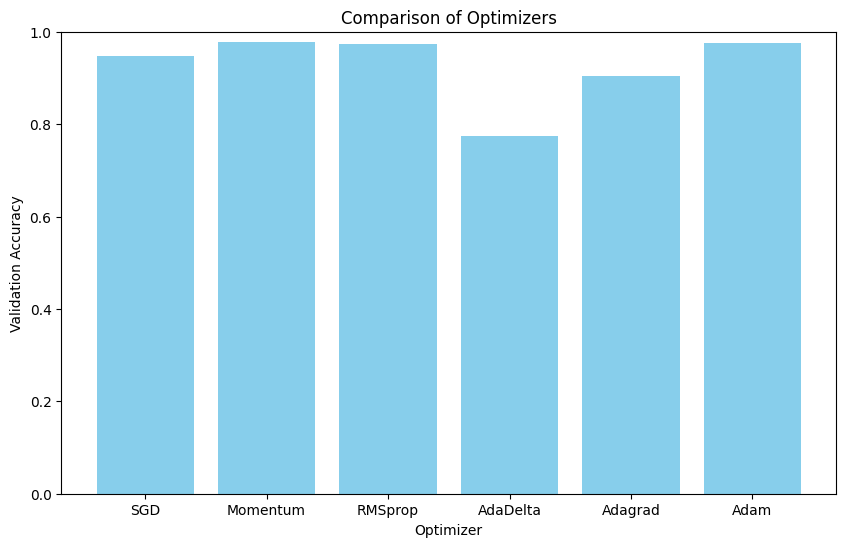

In [83]:
# Plotting the results
names = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(10, 6))
plt.bar(names, accuracies, color='skyblue')
plt.xlabel('Optimizer')
plt.ylabel('Validation Accuracy')
plt.title('Comparison of Optimizers')
plt.ylim([0, 1])
plt.show()

# Anothe challenge

# In this dataset, all deep learning architectures attempted so far have resulted in overfitting. Explore and apply various techniques to mitigate overfitting, such as regularization, dropout, data augmentation, and early stopping. Please provide feedback on the effectiveness of each method and summarize your results.

# Dataset Description

This dataset contains information related to students in an educational context. It includes various demographic, behavioral, and academic features, which can be used to analyze student performance and engagement. The dataset consists of the following attributes:

- **gender:** The gender of the student (e.g., male, female).
- **NationalITy:** The nationality of the student, which may influence educational outcomes.
- **PlaceofBirth:** The geographic location where the student was born, providing insights into potential cultural and socio-economic factors.
- **StageID:** The educational stage or level the student is currently in (e.g., primary, secondary).
- **GradeID:** The grade or year the student is enrolled in, indicating their progress in the education system.
- **SectionID:** The specific section or class within a grade that the student belongs to.
- **Topic:** The subject or topic of study, relevant for performance analysis in specific areas.
- **Semester:** The semester in which the data was collected, which may affect academic performance and engagement.
- **Relation:** The relationship of the student with their parents (e.g., mother, father), potentially influencing support and academic outcomes.
- **raisedhands:** The number of times the student raised their hands in class, indicating participation and engagement.
- **VisITedResources:** The number of educational resources the student has accessed, which reflects their engagement with the material.
- **AnnouncementsView:** The number of times the student viewed announcements from the school, suggesting their awareness of important updates.
- **Discussion:** The level of participation in discussions, indicating engagement in collaborative learning.
- **ParentAnsweringSurvey:** Responses from parents in a survey, which may provide insights into parental involvement.
- **ParentschoolSatisfaction:** The satisfaction level of parents with the school, which could correlate with student performance.
- **StudentAbsenceDays:** The number of days the student was absent, which can impact learning outcomes.
- **Class:** The target variable indicating the student's performance category or final grade, often used for classification tasks.

**Challenges:** The dataset may exhibit challenges such as class imbalance, varying levels of engagement among students, and the influence of external factors on academic performance.

This dataset is suitable for analysis aimed at understanding student behavior, predicting academic outcomes, and identifying factors contributing to student success or challenges.


In [85]:
import os

import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support

from matplotlib import pyplot as plt
import seaborn as sns


In [86]:
df = pd.read_csv('Dataset.csv')
df.loc[df["Class"] == "L", "Class"] = 0
df.loc[df["Class"] == "M", "Class"] = 1
df.loc[df["Class"] == "H", "Class"] = 2
display(df)
print(df.columns)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,1
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,1
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,0
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,0
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,0
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,1
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,1
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,0


Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')
